# Introduction

<font color = 'blue'>
Content: 

1. [Decomposition](#1)
   * 1.1 [Load and Check Data](#2)
   * 1.2 [Log Transform](#3)
   * 1.3 [Decomposition of Additive Time Series](#4)
   * 1.4 [Libraries](#5)
   * 1.5 [Load and Check Data](#6)
   * 1.6 [Outlier Observations](#7)
1. [Forecast](#8)
   * 2.1 [ARIMA - Autoregressive Integrated Moving Average](#9)
   * 2.2 [CF and PACF plots](#10)
   * 2.3 [Ljung-Box Test](#11)
   * 2.4 [Residual Plot](#12)
   * 2.5 [Forecast](#13)
1. [Clustering](#14)
   * 3.1 [Time Series Clustering](#15)
   * 3.2 [Data Preparation](#16)
   * 3.2 [Calculate Distance](#17)
   * 3.3 [Hierarchical Clustering](#18)
1. [Classification](#19)
   * 4.1 [Classification with Decision Tree](#20)
   * 4.2 [Classification Performance](#21)


<a id = "1"></a><br>

# 1. Decomposition 
<a id = "2"></a><br>
## 1.1. Load and Check Data

In [1]:
# Time Series Data
data("AirPassengers")
AP <- AirPassengers  
str(AP)  # there are 144 values from 1949 to 1961

 Time-Series [1:144] from 1949 to 1961: 112 118 132 129 121 135 148 148 136 119 ...


In [2]:
head(AP)

[1] 112 118 132 129 121 135

In [3]:
ts(AP, frequency = 12, start = c(1949, 1)) # frequency we have monthly data so 12, and it starts 1949, first month 1
# As we can see below years and monthly passengers count


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [4]:
attributes(AP) # we can see this time series data attributes

$tsp
[1] 1949.000 1960.917   12.000

$class
[1] "ts"

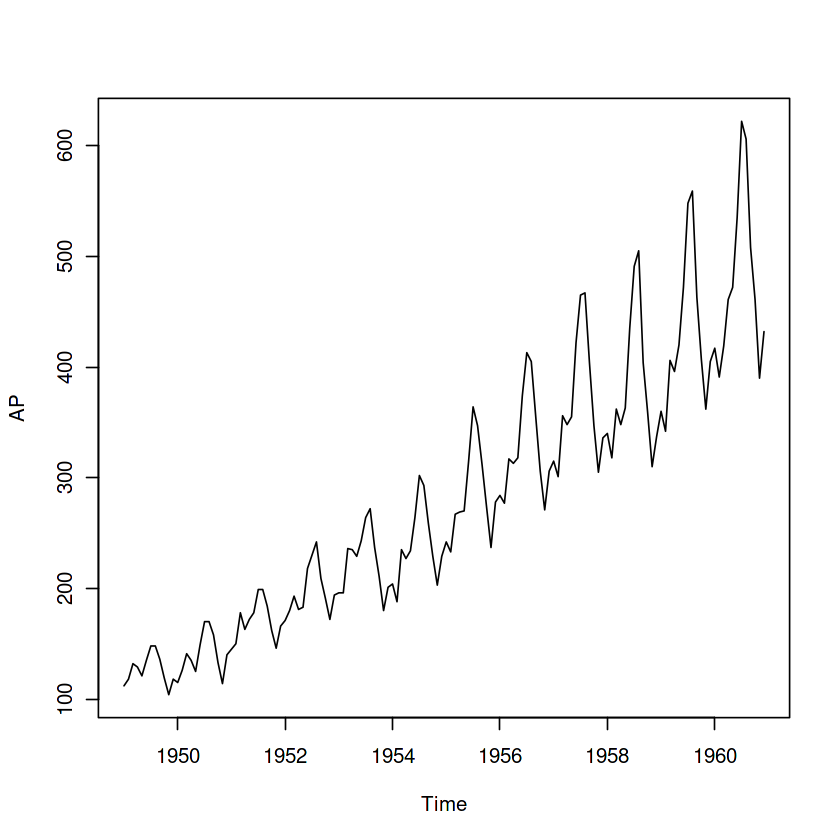

In [5]:
plot(AP)
# ploy shows that time series is non-stationary

<a id = "3"></a><br>
## 1.2. Log Transform

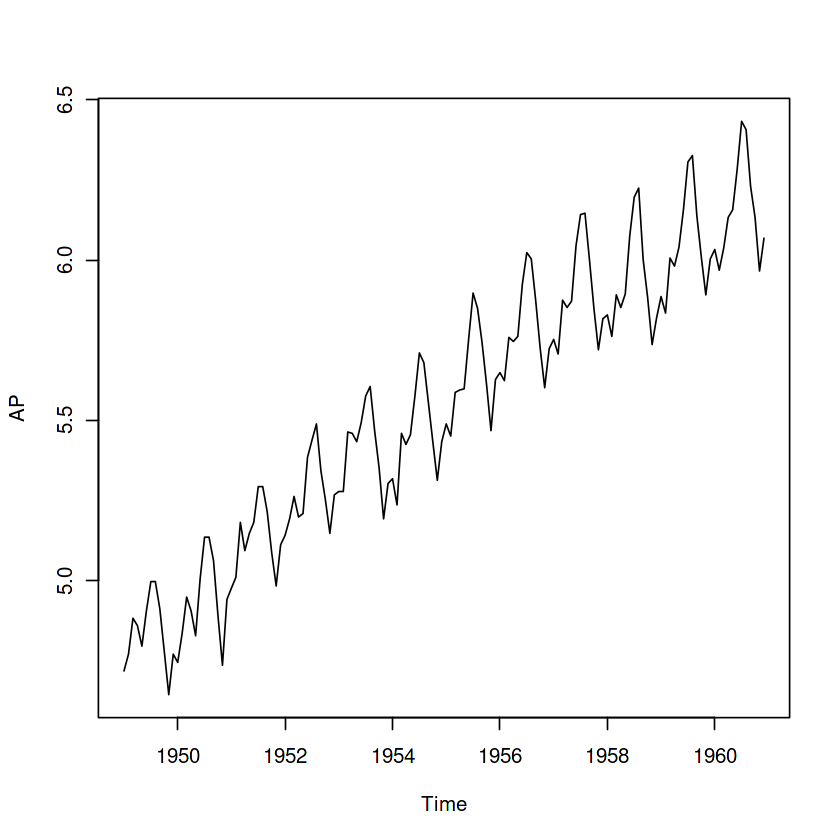

In [6]:
# Log transform
AP <- log(AP)
plot(AP)
# as we can see plot doesn't fluctuate as early one

<a id = "4"></a><br>
## 1.3. Decomposition of Additive Time Series

[1] -0.085815019 -0.114412848  0.018113355 -0.013045611 -0.008966106
 [6]  0.115392997  0.210816435  0.204512399  0.064836351 -0.075271265
[11] -0.215845612 -0.100315075

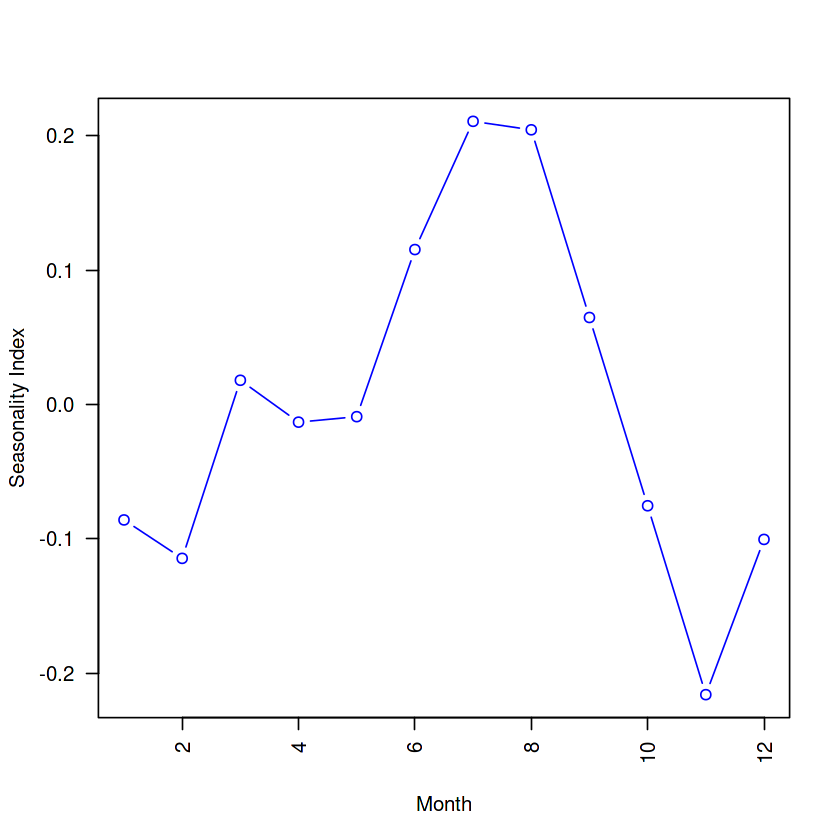

In [7]:
# Decomposition of additive time series
decomp <- decompose(AP)
decomp$figure  # each shows each month 
plot(decomp$figure,
     type = "b",
     xlab = "Month",
     ylab = "Seasonality Index",
     col = "blue",  # line color
     las = 2)  # numbers appear vertical

In [8]:
# when we check top two values 7 and 8 (july and august) have 20% more passengers for all year
# November is lower one, 20% is lower
# 3, 4, 5 is almost average

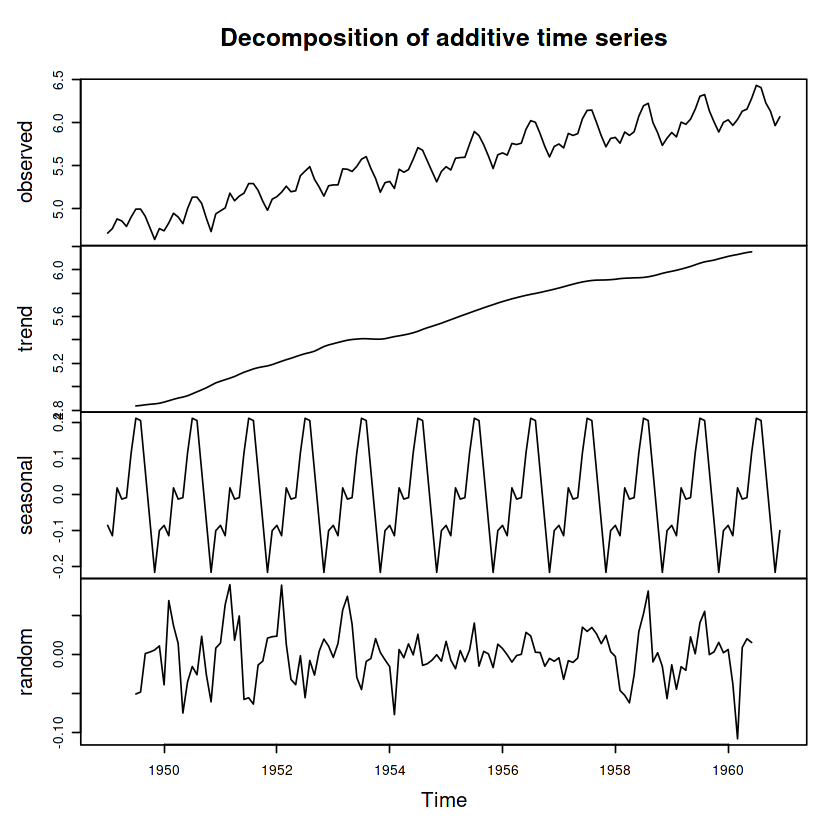

In [9]:
plot(decomp)
# when we look at the plot
# the first one is original time series

<a id = "8"></a><br>
# 2. Forecast 
<a id = "9"></a><br>
## 2.1 ARIMA - Autoregressive Integrated Moving Average

In [10]:
# ARIMA - Autoregressive Integrated Moving Average
# install.packages("forecast")
library(forecast)
model <- auto.arima(AP) # it gives best ARIMA model
model

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Series: AP 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731

sigma^2 estimated as 0.001371:  log likelihood=244.7
AIC=-483.4   AICc=-483.21   BIC=-474.77

In [11]:
# series refers : AP which is our data
# ARIMA(0, 1, 1) first one is p-AR order, second one is d - degree of differencing, third one is q - MA order
# we see coeffecients and standart error
# AIC - Aike information criterion
# AICc - AIC with correction
# BIC - Bayesian information creation 
# they gives us information for selection best model

In [12]:
# let's see attibutes of model
attributes(model)

$names
 [1] "coef"      "sigma2"    "var.coef"  "mask"      "loglik"    "aic"      
 [7] "arma"      "residuals" "call"      "series"    "code"      "n.cond"   
[13] "nobs"      "model"     "bic"       "aicc"      "x"         "fitted"   

$class
[1] "forecast_ARIMA" "ARIMA"          "Arima"

In [13]:
# for example, let's see coef
model$coef

ma1       sma1 
-0.4018280 -0.5569448

<a id = "10"></a><br>
## 2.2. ACF and PACF Plots  

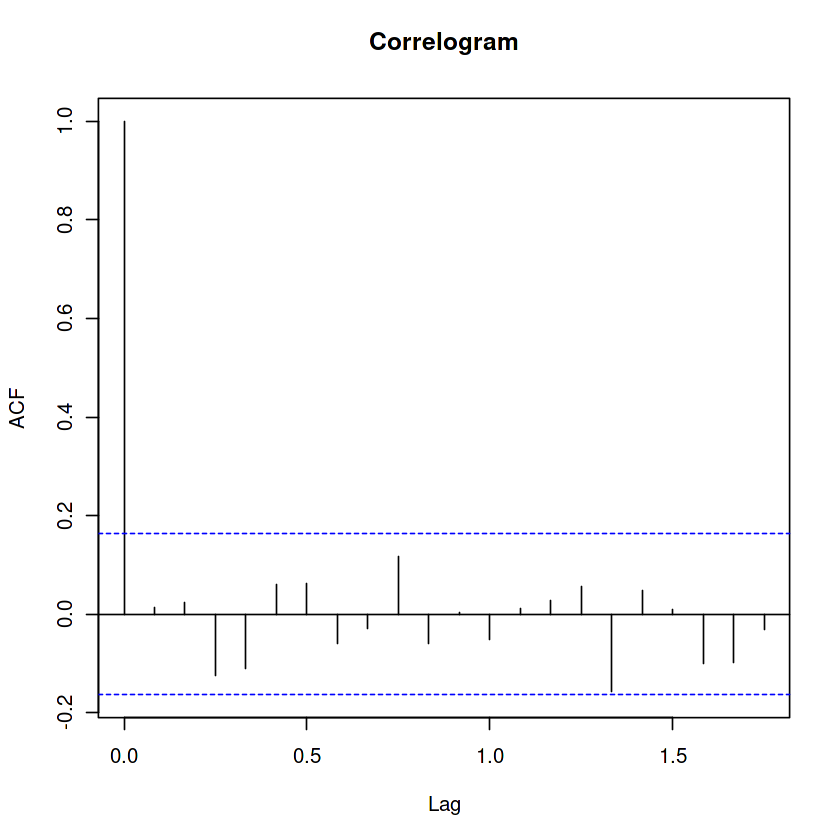

In [14]:
#  ACF and PACF plots 
# It is always good to check these
acf(model$residuals, main = "Correlogram") # residuals is difference between predict and actual values

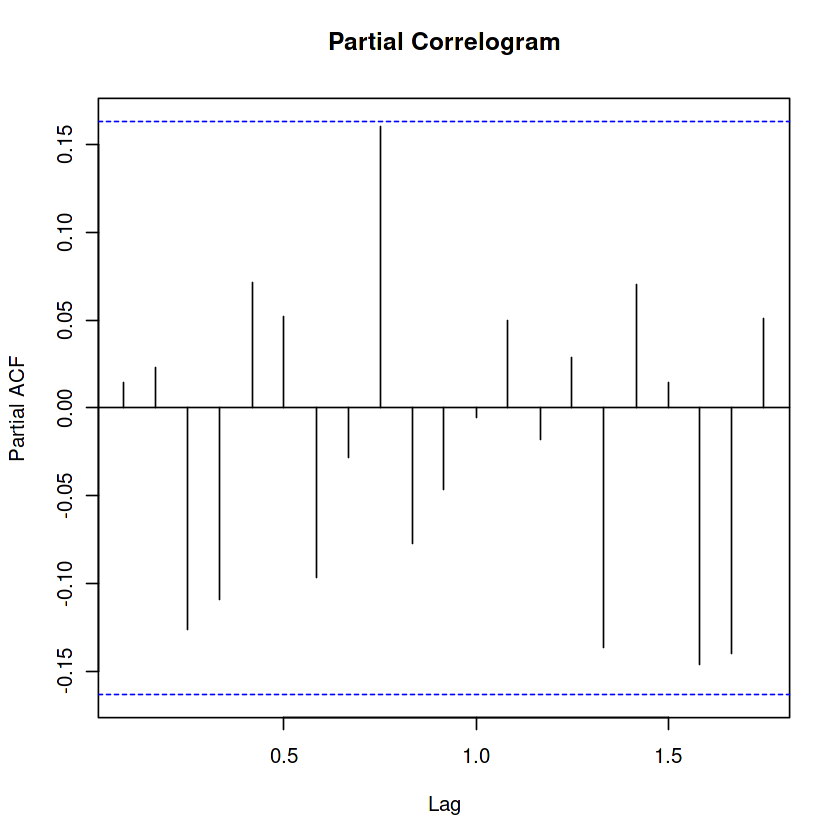

In [15]:
# when we check the plot, we see blue lines, reflecting significance bones. Basically this graph shows that auto correlations for each forcast errors do not exceed signicance bones

pacf(model$residuals, main = "Partial Correlogram")

<a id = "11"></a><br>
## 2.3. Ljung-Box Test  

In [16]:
# Ljung-Box Test
Box.test(model$residuals, lag = 20, type = "Ljung-Box")
# we consider p-value


	Box-Ljung test

data:  model$residuals
X-squared = 17.688, df = 20, p-value = 0.6079


Ljung-Box Test

<a id = "12"></a><br>
## 2.4 Residual Plot

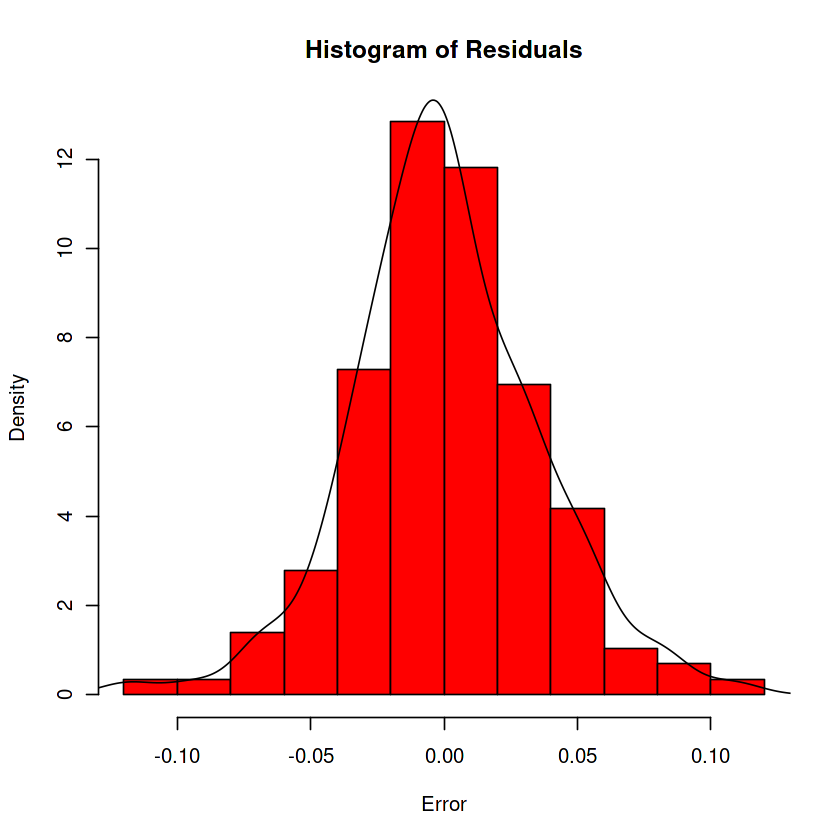

In [17]:
# Residual Plot
hist(model$residuals,
     col = "red",
     xlab = "Error",
     main = "Histogram of Residuals",
     freq = FALSE)
lines(density(model$residuals))

<a id = "13"></a><br>
## 2.5 Forecast

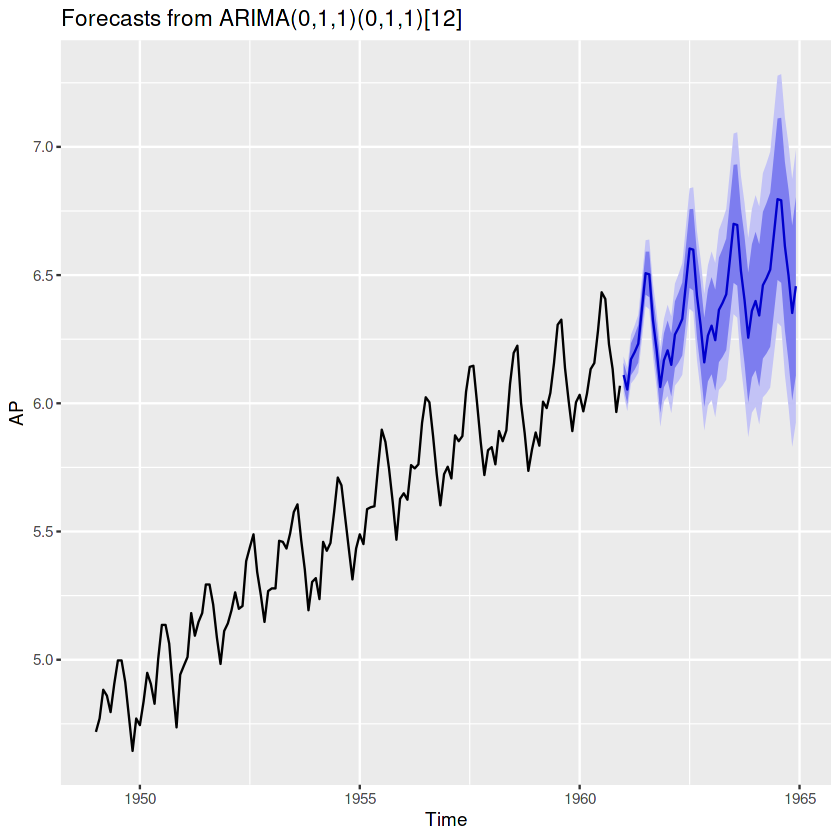

In [18]:
# Forecast
f <- forecast(model, 48) # model is we created, we will predict next 48 months
library(ggplot2)
autoplot(f)

In [19]:
# We see next four years. it also give two confidence levels

# we can easily see the accuracy scores
accuracy(f)


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.0005730622,0.03504883,0.02626034,0.01098898,0.4752815,0.2169522,0.01443892


<a id = "14"></a><br>
# 3. Clustering
<a id = "15"></a><br>
## 3.1 Time Series Clustering

In [20]:
# Time Series Clustering

# Data
data <- read.table("../input/time-series/data_time.txt", header = F, sep = "")
str(data)

'data.frame':	600 obs. of  60 variables:
 $ V1 : num  28.8 24.9 31.4 25.8 27.2 ...
 $ V2 : num  34.5 25.7 30.6 30.5 29.2 ...
 $ V3 : num  31.3 27.6 26.4 35.4 33.7 ...
 $ V4 : num  31.3 32.8 24.3 25.6 25.6 ...
 $ V5 : num  28.9 27.9 27.9 28 24.7 ...
 $ V6 : num  33.8 31.6 28.5 25.3 28.9 ...
 $ V7 : num  25.4 31.5 25 28.1 35.8 ...
 $ V8 : num  27.8 35.5 32.4 29.4 34.9 ...
 $ V9 : num  35.2 28 25.2 31.5 24.6 ...
 $ V10: num  27.1 31.7 27.3 27.3 34.2 ...
 $ V11: num  32.9 27.5 31.8 29 28 ...
 $ V12: num  29.2 31.2 27.3 29 25.3 ...
 $ V13: num  36 27.5 28.3 30 35.4 ...
 $ V14: num  32.3 31.4 26.6 30.3 34.9 ...
 $ V15: num  34.5 27.8 24 30.4 25.1 ...
 $ V16: num  32.9 24.5 35.1 24.3 29.5 ...
 $ V17: num  34.1 27.6 31.6 24.3 33.2 ...
 $ V18: num  26.5 35.6 32.6 35.1 31.1 ...
 $ V19: num  27.7 35.4 31 25.4 31.4 ...
 $ V20: num  26.4 31.4 34.1 32.1 26.5 ...
 $ V21: num  25.8 30.7 26.9 33.3 28.6 ...
 $ V22: num  29.3 24.1 31.5 25 31.7 ...
 $ V23: num  30.7 35.1 35 35.3 35.9 ...
 $ V24: num  29.5

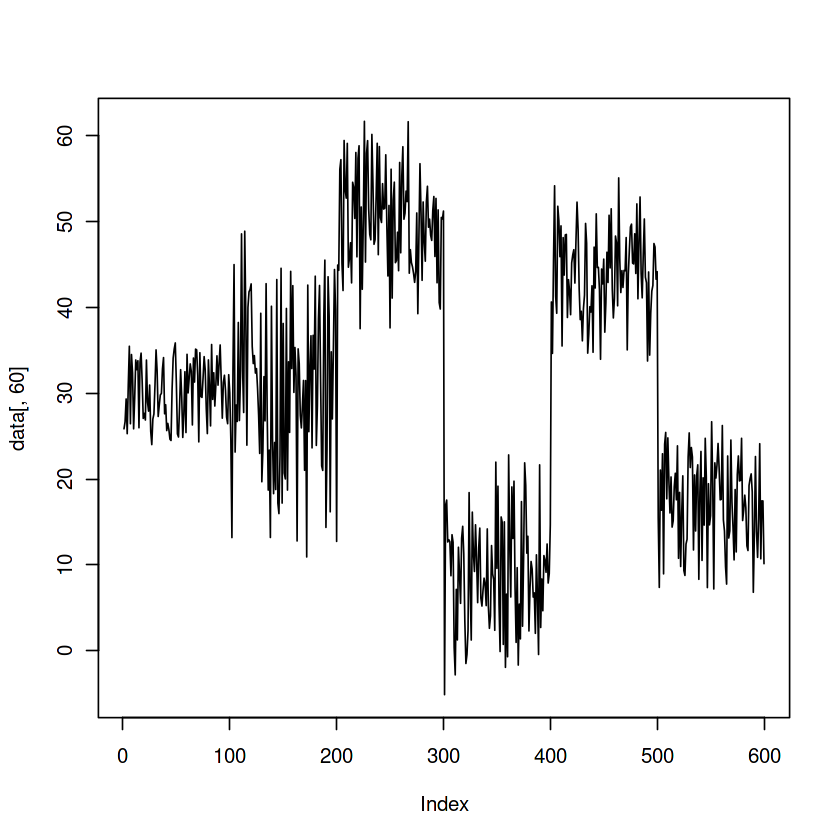

In [21]:
plot(data[, 60], type = "l") # all rows and 60 columns
# we see 6 different patterns 

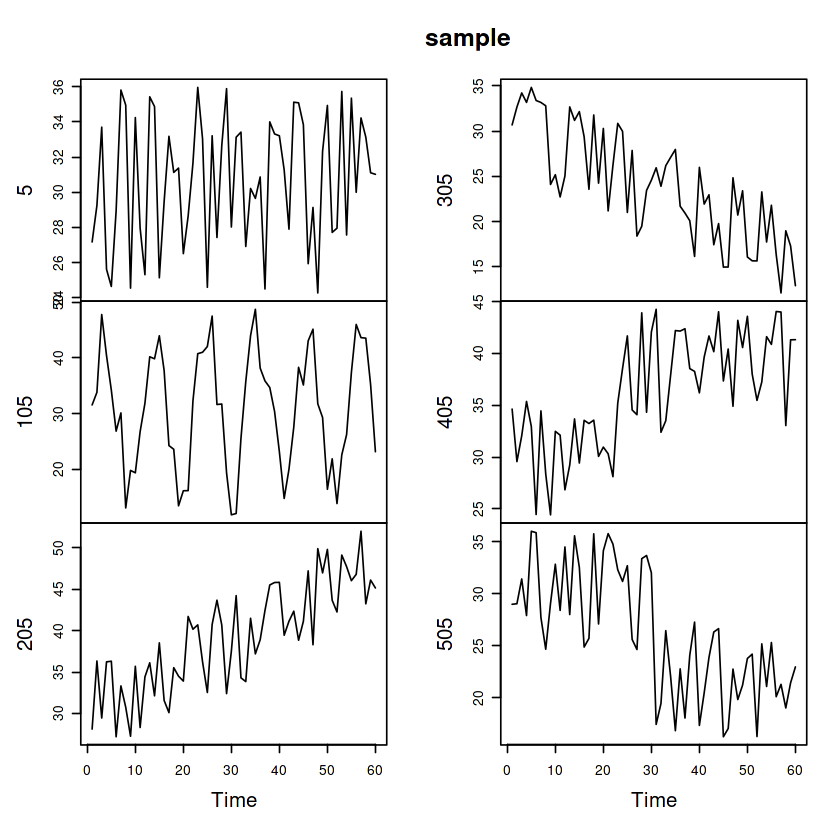

In [22]:
# if we want to see one sample for each class
j <- c(5, 105, 205, 305, 405, 505)
sample <- t(data[j,])
plot.ts(sample)

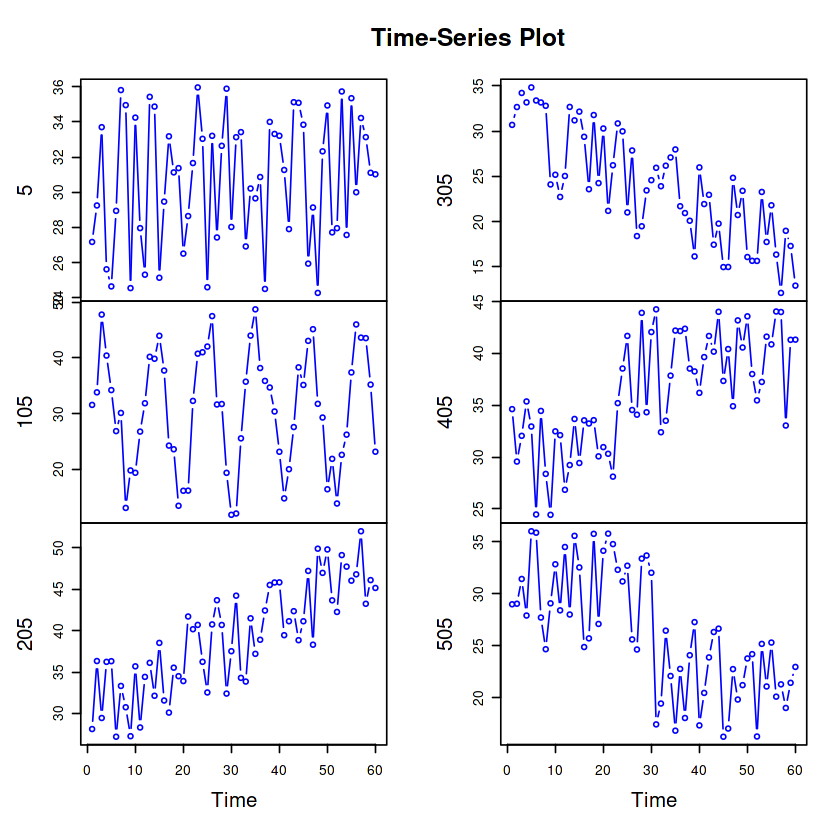

In [23]:
# we can modify better plot
plot.ts(sample,
        main = "Time-Series Plot",
        col = "blue",
        type = "b")

<a id = "16"></a><br>
## 3.2 Data Preparation

In [24]:
# Data Preparation
n <- 10 # let's choose 10 cases for each class, systematic random cases
s <- sample(1:100, n)
# let's check s
s
# As we can see random 10 different sample

[1] 75 34 81 96 12 23 18 90 22 29

In [25]:
# let's make 6 systematic random samples
i <- c(s, 100+s, 200+s, 300+s, 400+s, 500+s)
d <- data[i, ]
str(d) # we have 60 obs due to we have 10 samples for each systematic random samples

'data.frame':	60 obs. of  60 variables:
 $ V1 : num  25.5 28.2 32.1 34.3 26.7 ...
 $ V2 : num  35.7 28.4 24.1 33.3 24.1 ...
 $ V3 : num  27 32.2 26.5 29.6 30 ...
 $ V4 : num  29.2 33.9 34.2 25.3 29.9 ...
 $ V5 : num  35.9 35.8 28 28.6 31.5 ...
 $ V6 : num  24.5 34 35.4 25.9 33.8 ...
 $ V7 : num  35.9 32.5 29.3 35.3 26.8 ...
 $ V8 : num  30.2 25 32.5 25.9 28.7 ...
 $ V9 : num  28.1 30.3 34.6 32.9 26.1 ...
 $ V10: num  31.1 27.2 29.4 24.3 35.7 ...
 $ V11: num  27.4 35.6 25.2 28.9 33.8 ...
 $ V12: num  31.7 28.5 32.1 25.5 25.1 ...
 $ V13: num  30.7 27.5 36 26.1 33 ...
 $ V14: num  30.9 30.5 28.6 30.4 25.8 ...
 $ V15: num  29.4 35.2 26.9 24.6 33 ...
 $ V16: num  32.5 29.3 35.2 34.5 26.1 ...
 $ V17: num  32 24.6 31.3 27.7 34.1 ...
 $ V18: num  24.1 33.3 26.2 31.7 31.9 ...
 $ V19: num  31.7 30 30.7 24.6 29.3 ...
 $ V20: num  27.5 29.6 24.7 26.7 35.9 ...
 $ V21: num  30.9 26.5 29.6 25.4 28.5 ...
 $ V22: num  35.3 29.5 32 33.4 28.8 ...
 $ V23: num  36 31.7 34.4 31.5 29.1 ...
 $ V24: num  31.3 

In [26]:
pattern <- c(rep("Normal", n),
             rep("Cyclic", n),
             rep("Increasing trend", n),
             rep("Decreasing trend", n),
             rep("Upward shift", n),
             rep("Downward shift", n)) # rep helps us replicate values x 

<a id = "17"></a><br>
## 3.3 Calculate Distances

In [27]:
# Calculate Distances
install.packages("dtw")
library(dtw)
distance <- dist(d, method = "DTW")  # out data is d

# now we are ready to hierarchical clustering

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: proxy


Attaching package: ‘proxy’


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix


Loaded dtw v1.22-3. See ?dtw for help, citation("dtw") for use in publication.




<a id = "18"></a><br>
## 3.4 Hierarchical Clustering

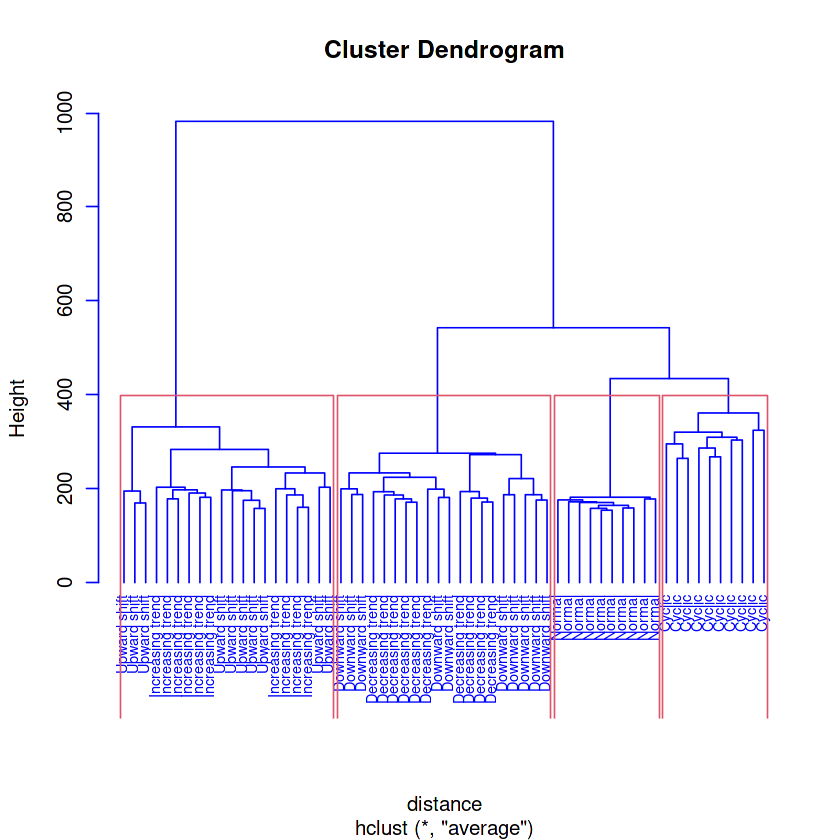

In [28]:
# Hierarchical Clustering
hc <- hclust(distance, method = "average")
plot(hc,
     labels = pattern,  # pattern we created above
     cex = 0.7, # for our label readability
     hang = -1,
     col = "blue")
rect.hclust(hc, k = 4) # how many cluster we want

<a id = "19"></a><br>
# 4. Classification

In [29]:
# TIME SERIES CLASSIFICATION

# Data Preparation
pattern100 <- c(rep("Normal", 100),
             rep("Cyclic", 100),
             rep("Increasing trend", 100),
             rep("Decreasing trend", 100),
             rep("Upward shift", 100),
             rep("Downward shift", 100))

In [30]:
newdata <- data.frame(data, pattern100)
str(newdata) # we have 6 character in pattern100, we'll convert them to factor, we have 600 obs, 61 variables

'data.frame':	600 obs. of  61 variables:
 $ V1        : num  28.8 24.9 31.4 25.8 27.2 ...
 $ V2        : num  34.5 25.7 30.6 30.5 29.2 ...
 $ V3        : num  31.3 27.6 26.4 35.4 33.7 ...
 $ V4        : num  31.3 32.8 24.3 25.6 25.6 ...
 $ V5        : num  28.9 27.9 27.9 28 24.7 ...
 $ V6        : num  33.8 31.6 28.5 25.3 28.9 ...
 $ V7        : num  25.4 31.5 25 28.1 35.8 ...
 $ V8        : num  27.8 35.5 32.4 29.4 34.9 ...
 $ V9        : num  35.2 28 25.2 31.5 24.6 ...
 $ V10       : num  27.1 31.7 27.3 27.3 34.2 ...
 $ V11       : num  32.9 27.5 31.8 29 28 ...
 $ V12       : num  29.2 31.2 27.3 29 25.3 ...
 $ V13       : num  36 27.5 28.3 30 35.4 ...
 $ V14       : num  32.3 31.4 26.6 30.3 34.9 ...
 $ V15       : num  34.5 27.8 24 30.4 25.1 ...
 $ V16       : num  32.9 24.5 35.1 24.3 29.5 ...
 $ V17       : num  34.1 27.6 31.6 24.3 33.2 ...
 $ V18       : num  26.5 35.6 32.6 35.1 31.1 ...
 $ V19       : num  27.7 35.4 31 25.4 31.4 ...
 $ V20       : num  26.4 31.4 34.1 32.1 26.5 ...

In [31]:
# let's convert to 
newdata["pattern100"] <- as.factor(newdata$pattern100)

<a id = "20"></a><br>
## 4.1 Classification with Decision Tree

In [32]:
# Classfication with Decision Tree
# install.packages("party")
library(party)
tree <- ctree(pattern100~., newdata) # tilda and dot means all variables, ourdata is newdata
tree


Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich




	 Conditional inference tree with 25 terminal nodes

Response:  pattern100 
Inputs:  V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, V29, V30, V31, V32, V33, V34, V35, V36, V37, V38, V39, V40, V41, V42, V43, V44, V45, V46, V47, V48, V49, V50, V51, V52, V53, V54, V55, V56, V57, V58, V59, V60 
Number of observations:  600 

1) V59 <= 45.6952; criterion = 1, statistic = 510.323
  2) V59 <= 35.9324; criterion = 1, statistic = 382.48
    3) V59 <= 23.9595; criterion = 1, statistic = 264.546
      4) V54 <= 27.3847; criterion = 1, statistic = 149.907
        5) V19 <= 35.1025; criterion = 1, statistic = 97.167
          6) V16 <= 24.8534; criterion = 1, statistic = 77.304
            7) V8 <= 31.5525; criterion = 0.961, statistic = 11.609
              8)*  weights = 54 
            7) V8 > 31.5525
              9)*  weights = 7 
          6) V16 > 24.8534
            10) V19 <= 23.9112; criterion = 1, statis

<a id = "21"></a><br>
## 4.2 Classification Performance

In [33]:
# Classification performance
tab <- table(Predicted = predict(tree, newdata), Actual =  newdata$pattern100)

sum(diag(tab))/sum(tab)  # classfication 95%percent is accurate

[1] 0.9516667